#  <span style="color:#3366ff"> Moteur de Recommandations de films (Arnaud ROUSSEAU)

# <span style="color:#3366ff"> 29 mai 2018 (Part 2 Cleanée - Variables Numériques)

<span style="color:#3366ff"> Ce notebook est dédié à l'analyse des variables numériques de la base de films "imdb-5000-movie-dataset", ainsi qu'a leur exploitation pour le fonctionnement du moteur de recommandations de films.
 
<span style="color:#3366ff"> Les variables numériques conservées sont:    
<span style="color:#3366ff"> - director_facebook_likes,                              
<span style="color:#3366ff"> - cast_total_facebook_likes,                                     
<span style="color:#3366ff"> - num_critic_for_reviews,       
<span style="color:#3366ff"> - num_voted_users,                                 
<span style="color:#3366ff"> - num_user_for_reviews,     
<span style="color:#3366ff"> - imdb_score,     
<span style="color:#3366ff"> - movie_facebook_likes. 
    
    
<span style="color:#3366ff"> Les variables alphanumériques conservées sont:    
<span style="color:#3366ff"> - movie_title (=index de la base),    
<span style="color:#3366ff"> - movie_imdb_link (pour l'ID).
    
<span style="color:#3366ff"> Les autres variables alphanumériques sont analysée dans le Notebook "Part 3 Cleanée".

### Chargement des librairies

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd

from sklearn import preprocessing, decomposition, cluster, metrics

### Ouverture de la base cleanée

In [3]:
data_films_clean_num_ = pd.read_csv(
    'DATA/data_films_clean_num.csv',    
    encoding='latin_1', 
    index_col=0,
    low_memory = False)

In [4]:
# "movie_imdb_link" n'est pas utilisé pour l'analyse, juste pour l'ID
data_films_clean_num = data_films_clean_num_.drop(['movie_imdb_link'], axis=1)

In [5]:
# Cette base num mesure
shape = data_films_clean_num.shape

print("Cette base de données numériques contient",shape[0], 
      "Films décrits avec", shape[1], "paramètres.")

Cette base de données numériques contient 4585 Films décrits avec 7 paramètres.


In [6]:
data_films_clean_num

,director_facebook_likes,cast_total_facebook_likes,num_critic_for_reviews,num_voted_users,num_user_for_reviews,imdb_score,movie_facebook_likes
movie_title,,,,,,,
Avatar,0.0,4834,723.0,886204,3054.0,7.9,33000
Pirates of the Caribbean: At World's End,563.0,48350,302.0,471220,1238.0,7.1,0
Spectre,0.0,11700,602.0,275868,994.0,6.8,85000
The Dark Knight Rises,22000.0,106759,813.0,1144337,2701.0,8.5,164000
John Carter,475.0,1873,462.0,212204,738.0,6.6,24000
Spider-Man 3,0.0,46055,392.0,383056,1902.0,6.2,0
Tangled,15.0,2036,324.0,294810,387.0,7.8,29000
Avengers: Age of Ultron,0.0,92000,635.0,462669,1117.0,7.5,118000
Harry Potter and the Half-Blood Prince,282.0,58753,375.0,321795,973.0,7.5,10000


# Reduction du nombre de dimensions avec la PCA

In [5]:
# preprocessing
data_films_prepro = preprocessing.scale(data_films_clean_num)

data_films_test = pd.DataFrame(data_films_clean_num,
                                columns = [                                                  
'num_critic_for_reviews',   
'num_voted_users',                             
'num_user_for_reviews',
'imdb_score',                                      
                                          ])

data_films_prepro_test = preprocessing.scale(data_films_test)

pca_test = decomposition.PCA(n_components=3)
pca_test.fit(data_films_prepro_test)

print("Variance des 2 premieres composantes principales", 
      pca.explained_variance_ratio_.cumsum())

In [7]:
pca = decomposition.PCA(n_components=2)
pca.fit(data_films_prepro)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
print("Variance des 2 premieres composantes principales", 
      pca.explained_variance_ratio_.cumsum())

Variance des 2 premieres composantes principales [0.46445101 0.59927022]


<span style="color:#3366ff"> Les deux 1eres PC représentent 59.9% de la variance.

In [9]:
data_films_prepro_trans= pca.transform(data_films_prepro)

# Cette base mesure
shape = data_films_prepro_trans.shape

print("Le tableau des Composantes Principales contient",shape[0], 
      "Films décrits avec", shape[1], "CP.")

Le tableau des Composantes Principales contient 4585 Films décrits avec 2 CP.


In [10]:
data_films_prepro_trans

array([[ 8.88636126,  0.85842386],
       [ 3.43049504,  0.37157526],
       [ 4.78209915,  2.2075587 ],
       ...,
       [-0.89507034, -0.38997049],
       [-1.48657801, -0.28990968],
       [-1.23416378, -0.30179035]])

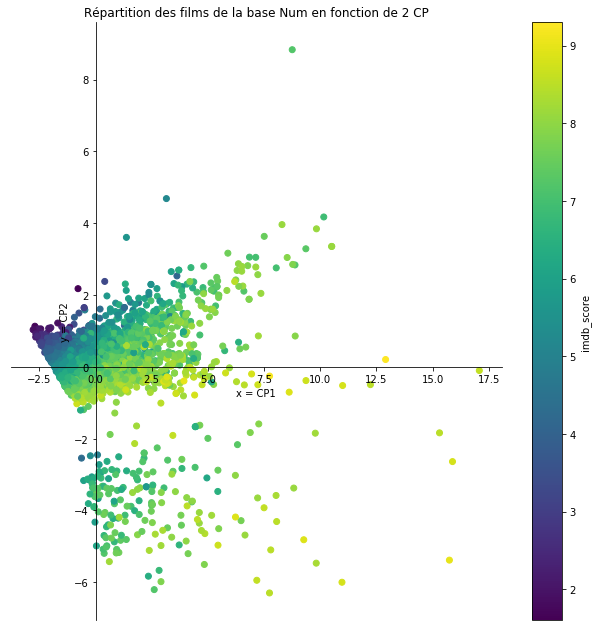

In [11]:
fig = plt.figure(figsize=(11,11))

ax = plt.subplot()
ax.set_title('Répartition des films de la base Num en fonction de 2 CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.scatter(data_films_prepro_trans[:,0], 
            data_films_prepro_trans[:,1],
            c=data_films_clean_num.get('imdb_score')
           )

plt.colorbar().set_label('imdb_score')

<span style="color:#3366ff"> <strong> Remarque: </strong> cet affichage représente la répartition des films en fonction des deux premières CP, qui sont une image de leur popularité.
Le code couleur représente le score IMDB.    
    
<span style="color:#3366ff"> <strong> L'ensemble des fims est compacté, cette data ne sera pas facile à séparer en plusieurs groupes. 

### Essais avec 3 PCA

In [12]:
pca3 = decomposition.PCA(n_components=3)
pca3.fit(data_films_prepro)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
print("Variance des 3 premieres composantes principales", 
      pca3.explained_variance_ratio_.cumsum())

Variance des 3 premieres composantes principales [0.46445101 0.59927022 0.73029302]


<span style="color:#3366ff"> Les 3 premières PC représentent 73% de la variance.

In [14]:
data_films_prepro_trans_3= pca3.transform(data_films_prepro)

# Cette base mesure
shape = data_films_prepro_trans_3.shape

print("Le tableau des Composantes Principales contient",shape[0], 
      "Films décrits avec", shape[1], "CP.")

Le tableau des Composantes Principales contient 4585 Films décrits avec 3 CP.


In [15]:
data_films_prepro_trans_3

array([[ 8.88636126,  0.85842386, -2.61818958],
       [ 3.43049504,  0.37157526,  0.99674176],
       [ 4.78209915,  2.2075587 , -1.02231544],
       ...,
       [-0.89507034, -0.38997049, -0.5404684 ],
       [-1.48657801, -0.28990968, -0.27608475],
       [-1.23416378, -0.30179035, -0.4013202 ]])

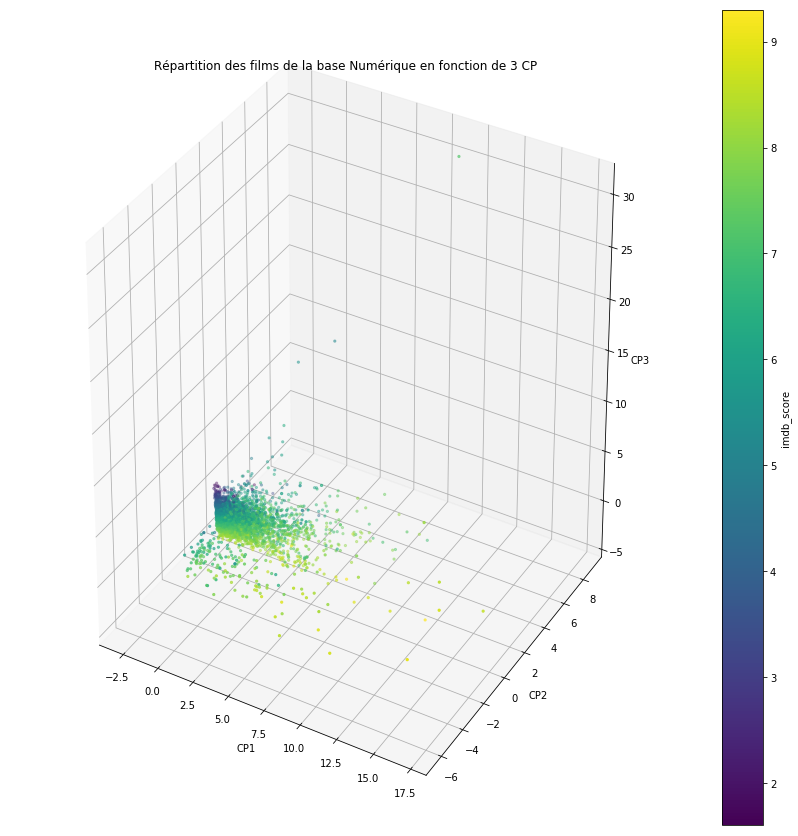

In [16]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111,projection='3d')
p =ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2], 
           c=data_films_clean_num.get('imdb_score'), 
           marker='.')

fig.colorbar(p).set_label('imdb_score')


ax.set_title('Répartition des films de la base Numérique en fonction de 3 CP') 

ax.set_xlabel('CP1')
ax.set_ylabel('CP2')
ax.set_zlabel('CP3')

plt.show()

<span style="color:#3366ff"> <strong> Conclusion: </strong> cet affichage représente la répartition des films en fonction des trois premières CP de la base NUmérique, qui sont une image de leur popularité.
Le code couleur représente le score IMDB.    
    
<span style="color:#3366ff"> <strong> L'ensemble des fims est compacté, cette data ne sera pas facile à séparer en plusieurs groupes.    

# Recherche des variables latentes

## Affichage des contribution de chaque variable aux 2 premières Composantes Principales

(-0.9, 0.4)

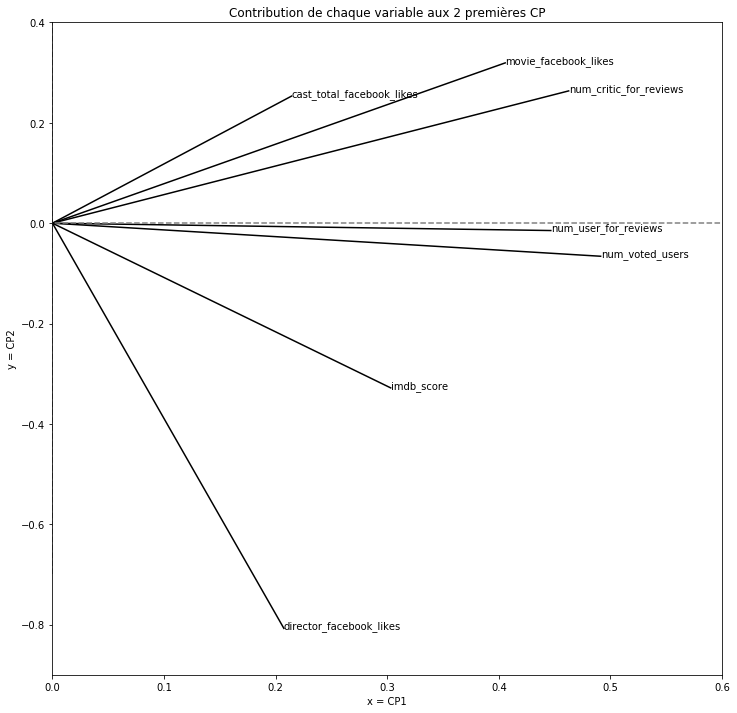

In [17]:
pcs = pca.components_

fig = plt.figure(figsize=(12,12))
ax = plt.subplot()
ax.set_title('Contribution de chaque variable aux 2 premières CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

for i , (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data_films_clean_num.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([0, 0.6])
plt.ylim([-0.9, 0.4])

<span style="color:#3366ff"> <strong>Remarque:</strong> on ne peut pas séparer les tendances facebook vs tendances IMDB.

## Affichage des contribution de chaque variable aux 3 premières Composantes Principales

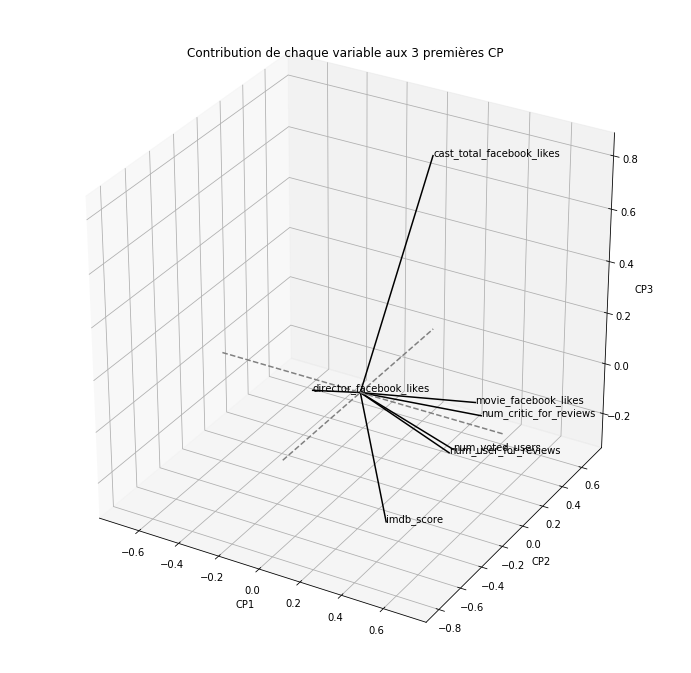

In [18]:
pcs3 = pca3.components_

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111,projection='3d')

ax.set_title('Contribution de chaque variable aux 3 premières CP')

#ax.scatter(pcs3[:,0], 
 #          pcs3[:,1], 
 #          pcs3[:,2], 
   #        c='b', marker='.')

for i , (x, y, z) in enumerate(zip(pcs3[0, :], pcs3[1, :], pcs3[2, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], [0, z], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    ax.text(x, y, z, data_films_clean_num.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')
 
ax.set_xlabel('CP1')
ax.set_ylabel('CP2')
ax.set_zlabel('CP3')
 
plt.show()

<span style="color:#3366ff"> <strong>Remarque:</strong> on ne peut pas séparer les tendances facebook vs tendances IMDB.

# Identification de groupes de films par Clustering avec K MEANS

<span style="color:#3366ff"> <strong> --> K-MEANS a un seul hyperparamètre à déterminer: le Nb de Clusters

### Recherche du Nb de Clusters du K-MEANS: silhouette

plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")


silhouettes = []
for num_cluster in range(2,100, 10):
    cls_kmean = cluster.KMeans(num_cluster, 
                        n_init=1, 
                        init='random')
    cls_kmean.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_kmean.labels_)
    silhouettes.append(silh)

plt.plot(range(2,100, 10), silhouettes, marker='o')

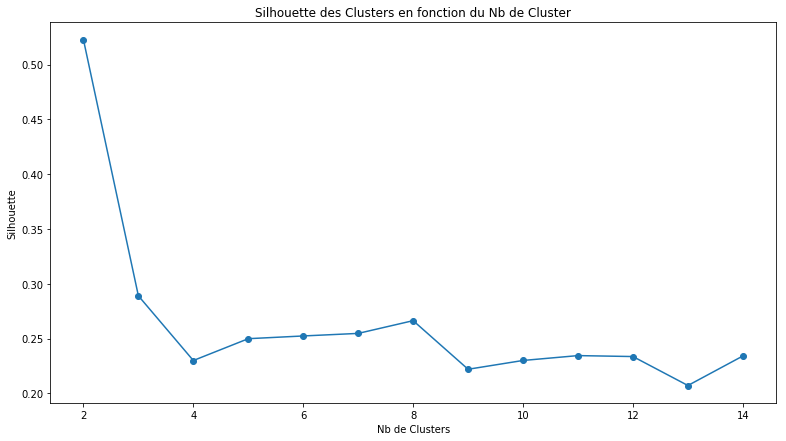

In [20]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")

silhouettes = []
for num_cluster in range(2,15):
    cls_kmean= cluster.KMeans(num_cluster, 
                        n_init=1, 
                        init='random')
    cls_kmean.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_kmean.labels_)
    silhouettes.append(silh)

plt.plot(range(2,15), silhouettes, marker='o')

<span style="color:#3366ff"> La silouhette est la plus élevée pour 2, 3, 6 ou 8 clusters.

### Recherche du Nb de Clusters du K-MEANS: Calinski

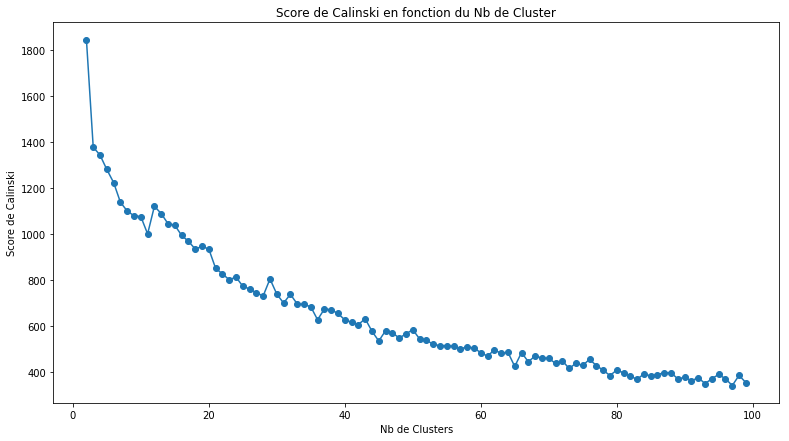

In [21]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")

calinski = []
for num_cluster in range(2,100, 10):
    cls_kmean= cluster.KMeans(num_cluster, 
                        n_init=1, 
                        init='random')
    cls_kmean.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_kmean.labels_)
    calinski.append(cali)

plt.plot(range(2,100, 10), calinski, marker='o')

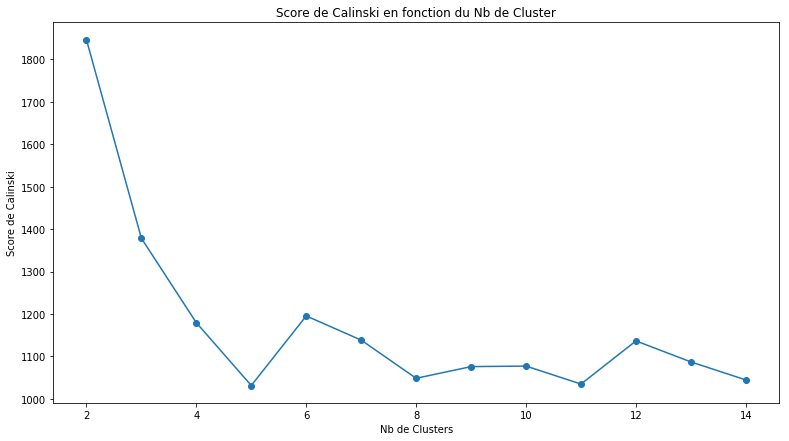

In [6]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")

calinski = []
for num_cluster in range(2,15):
    cls_kmean= cluster.KMeans(num_cluster, 
                        n_init=1, 
                        init='random')
    cls_kmean.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_kmean.labels_)
    calinski.append(cali)

plt.plot(range(2,15), calinski, marker='o')

In [7]:
test=max(calinski)
test

1846.6230880156043

<span style="color:#3366ff">  Le Calinski est le plus élevé pour 2, 3, 5, 6 clusters.

<span style="color:#3366ff"> <strong>Conclusion:</strong>  Ces deux indicateurs (Calinski + Silouhette) ont des valeurs élevées pour 2 ou 3 clusters.

### Affichage des Clusters du K-MEANS en 2 dimensions

<strong> Affichage de 2 et 3 groupes

Text(0.5,1,'Affichage des 3 clusters K-MEANS en 2D')

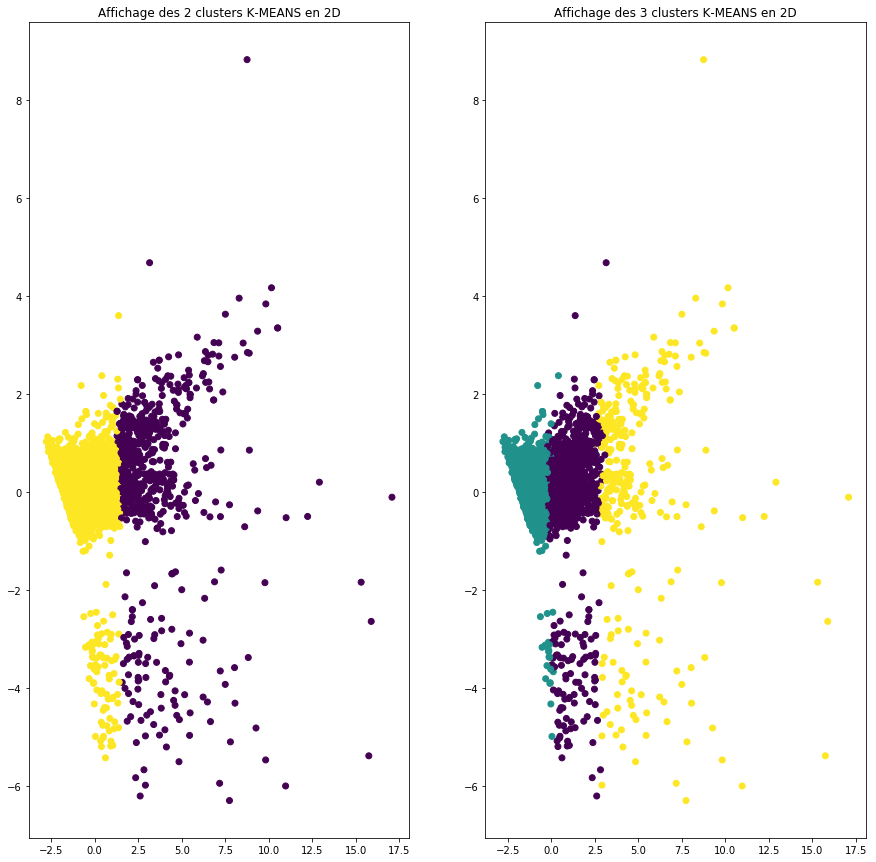

In [23]:
fig = plt.figure(figsize=(15,15))

cls_kmean_2= cluster.KMeans(2, n_init=1, init='random')
cls_kmean_2.fit(data_films_prepro)
ax = fig.add_subplot(121)
ax.scatter(data_films_prepro_trans[:,0], 
           data_films_prepro_trans[:,1], 
           c=cls_kmean_2.labels_)
ax.set_title("Affichage des 2 clusters K-MEANS en 2D")

cls_kmean_3= cluster.KMeans(3, n_init=1, init='random')
cls_kmean_3.fit(data_films_prepro)
ax = fig.add_subplot(122)
ax.scatter(data_films_prepro_trans[:,0], 
           data_films_prepro_trans[:,1], 
           c=cls_kmean_3.labels_)
ax.set_title("Affichage des 3 clusters K-MEANS en 2D")

<strong> Affichage de 6 et 8 clusters.

Text(0.5,1,'Affichage des 8 clusters K-MEANS en 2D')

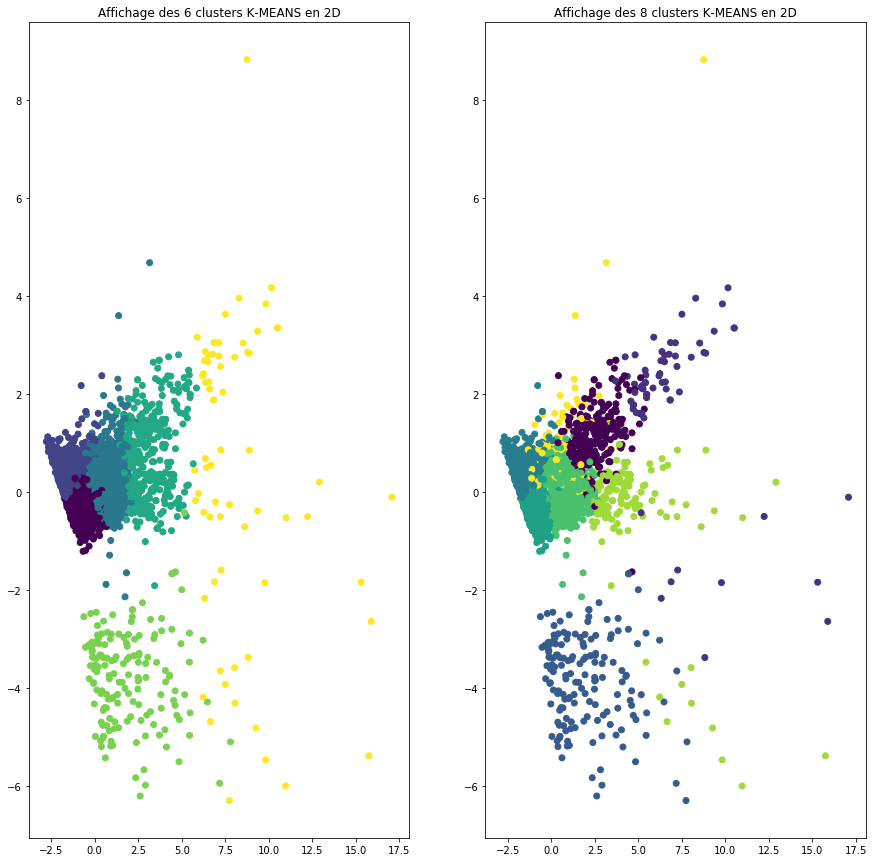

In [24]:
fig = plt.figure(figsize=(15,15))


cls_kmean_6= cluster.KMeans(6, n_init=1, init='random')
cls_kmean_6.fit(data_films_prepro)
ax = fig.add_subplot(121)
ax.scatter(data_films_prepro_trans[:,0], 
           data_films_prepro_trans[:,1], 
           c=cls_kmean_6.labels_)
ax.set_title("Affichage des 6 clusters K-MEANS en 2D")


cls_kmean_8= cluster.KMeans(8, n_init=1, init='random')
cls_kmean_8.fit(data_films_prepro)
ax = fig.add_subplot(122)
ax.scatter(data_films_prepro_trans[:,0], 
           data_films_prepro_trans[:,1], 
           c=cls_kmean_8.labels_)
ax.set_title("Affichage des 8 clusters K-MEANS en 2D")

### Affichage des Clusters du K-MEANS en 3 dimensions

Text(0.5,0.92,'Affichage des 3 clusters K-MEANS en 3D')

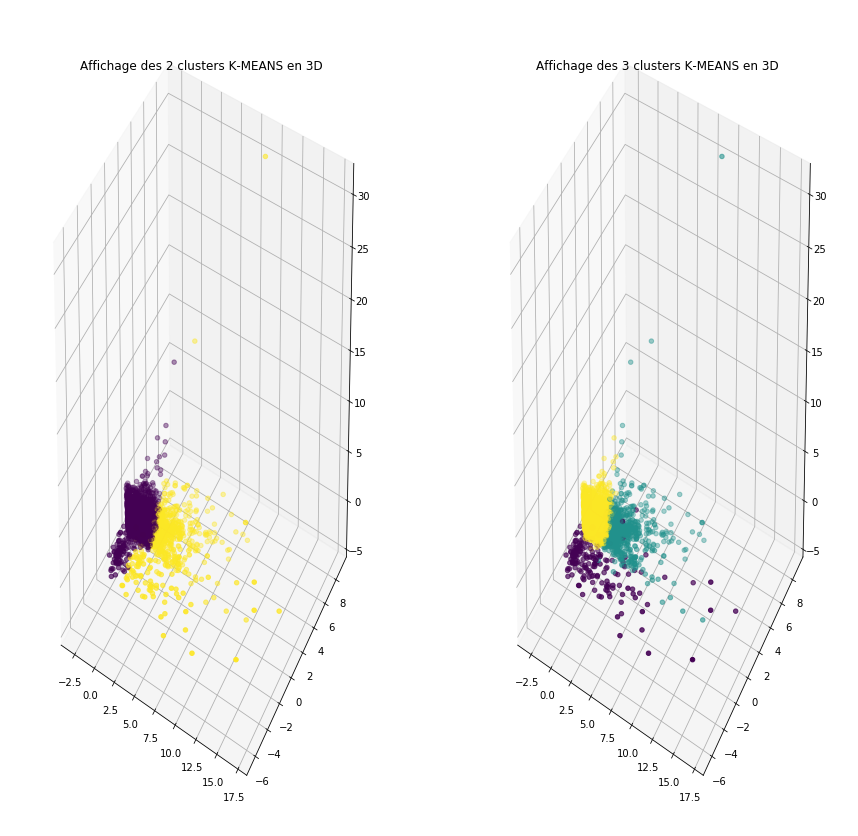

In [25]:
fig = plt.figure(figsize=(15,15))

#ax = fig.add_subplot(121,projection='3d')

cls_kmean_2 = cluster.KMeans(2, n_init=1, init='random')
cls_kmean_2.fit(data_films_prepro)
ax = fig.add_subplot(121,projection='3d')
ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2], 
           c=cls_kmean_2.labels_)
ax.set_title("Affichage des 2 clusters K-MEANS en 3D")

cls_kmean_3= cluster.KMeans(3, n_init=1, init='random')
cls_kmean_3.fit(data_films_prepro)
ax = fig.add_subplot(122,projection='3d')
ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2], 
           c=cls_kmean_3.labels_)
ax.set_title("Affichage des 3 clusters K-MEANS en 3D")

Text(0.5,0.92,'Affichage des 8 clusters K-MEANS en 3D')

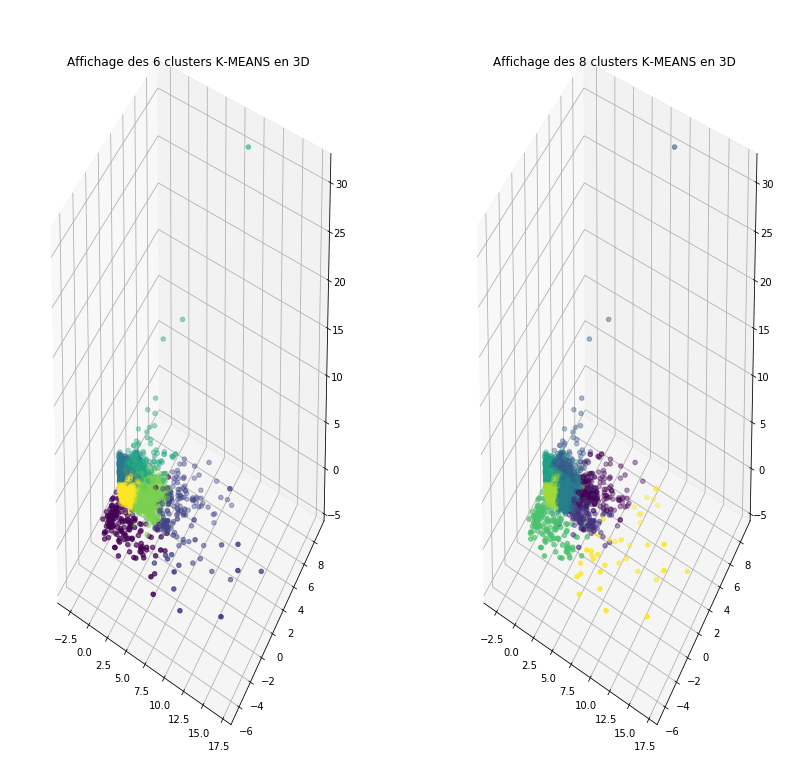

In [26]:
fig = plt.figure(figsize=(14,14))

#ax = fig.add_subplot(121,projection='3d')

cls_kmean_6 = cluster.KMeans(6, n_init=1, init='random')
cls_kmean_6.fit(data_films_prepro)
ax = fig.add_subplot(121,projection='3d')
ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2], 
           c=cls_kmean_6.labels_)
ax.set_title("Affichage des 6 clusters K-MEANS en 3D")

cls_kmean_8= cluster.KMeans(8, n_init=1, init='random')
cls_kmean_8.fit(data_films_prepro)
ax = fig.add_subplot(122,projection='3d')
ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2], 
           c=cls_kmean_8.labels_)
ax.set_title("Affichage des 8 clusters K-MEANS en 3D")

# Conclusion Clustering par K-MEANS

<span style="color:#3366ff"> Le clustering K-MEANS se fera en <strong> 3 groupes.    

<span style="color:#3366ff"> Les indicateurs sont en effet meilleurs avec deux clusters mais il est quand même plus interressant d'avoir une recommandation un peu plus variée.

# Identification de groupes de films par Clustering par DBSCAN

<span style="color:#3366ff"> <strong> --> DBSCAN a 2 hyperparamètres à déterminer: "epsilon" & le "Nb mini de point par Clusters"

### Recherche de la variable Epsilon de DBSCAN: silhouette

<strong> eps de 0.6 a 6 / Min_sample à 6

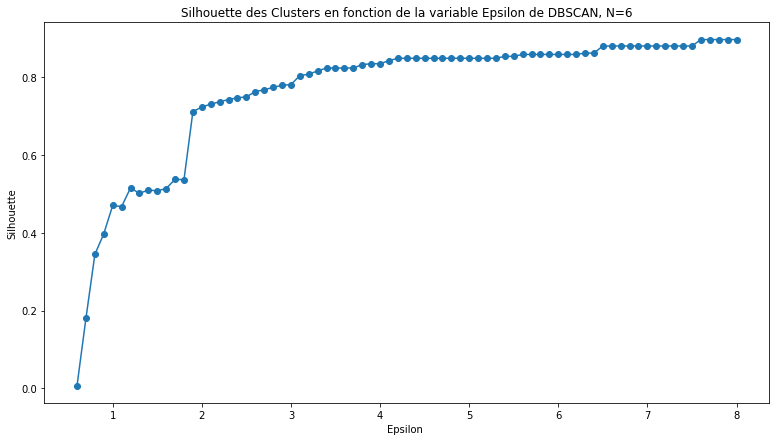

In [27]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction de la variable Epsilon de DBSCAN, N=6')
plt.ylabel("Silhouette")
plt.xlabel("Epsilon ")

#cluster.DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’,metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=1)

range_epsilon =[0.6, 0.7, 0.8, 0.9, 1.0, 
                1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 
                2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0,
                3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0,
                4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 
                5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 
                6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0,
                7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0,] 

silhouettes = []
for epsilon_val in range_epsilon:
    #epsilon_val = epsilon_val/10
    cls_dbscan= cluster.DBSCAN(eps=epsilon_val, 
                        min_samples=6, # le film d'entré + les 5 autres 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_dbscan.labels_)
    silhouettes.append(silh)

 
plt.plot(range_epsilon, silhouettes, marker='o')

<span style="color:#3366ff"> Un 1er palier à partir de eps = 1.2 et le second à partir de eps = 2 

<strong> eps de 0.6 a 6 / Min_sample à 15

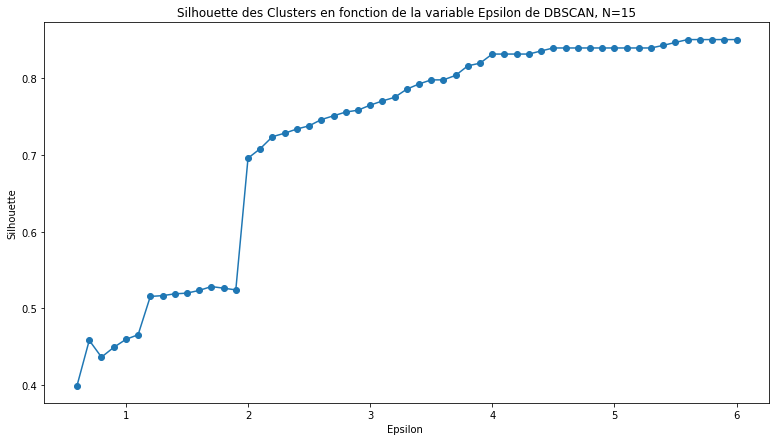

In [28]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction de la variable Epsilon de DBSCAN, N=15')
plt.ylabel("Silhouette")
plt.xlabel("Epsilon ")

#cluster.DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’,metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=1)

range_epsilon =[0.6, 0.7, 0.8, 0.9, 1.0, 
                1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 
                2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0,
                3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0,
                4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 
                5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0] 

silhouettes = []
for epsilon_val in range_epsilon:
    #epsilon_val = epsilon_val/10
    cls_dbscan= cluster.DBSCAN(eps=epsilon_val, 
                        min_samples=15, # le film d'entré + les 5 autres 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_dbscan.labels_)
    silhouettes.append(silh)

 
plt.plot(range_epsilon, silhouettes, marker='o')

<span style="color:#3366ff"> Un 1er palier à partir de eps = 1.2 et le second à partir de eps = 2 

### Recherche de la variable Epsilon de DBSCAN: Calinski

<strong> eps de 0.6 a 8 / Min_sample à 6

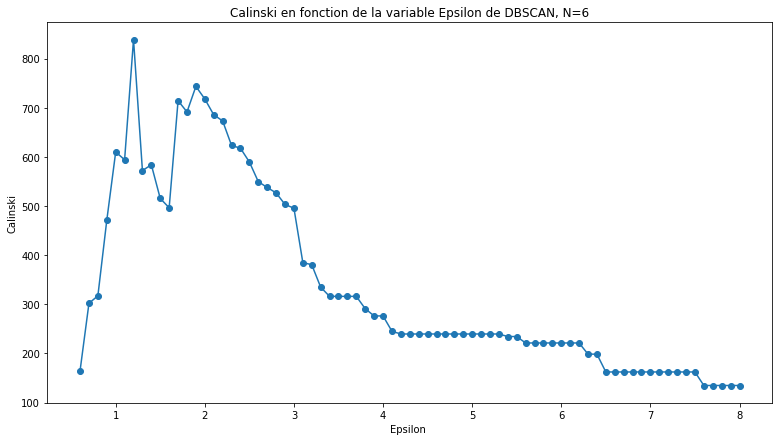

In [29]:
plt.figure(figsize=(13,7))

plt.title('Calinski en fonction de la variable Epsilon de DBSCAN, N=6')
plt.ylabel("Calinski")
plt.xlabel("Epsilon ")

#cluster.DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’,metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=1)

range_epsilon =[0.6, 0.7, 0.8, 0.9, 1.0, 
                1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 
                2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0,
                3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0,
                4.1, 4.2, 4.3, 4.4, 4.5] 

calinski = []
for epsilon_val in range_epsilon:
    #epsilon_val = epsilon_val/10
    cls_dbscan= cluster.DBSCAN(eps=epsilon_val, 
                        min_samples=6, # le film d'entré + les 5 autres 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)

    cls_dbscan.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_dbscan.labels_)
    calinski.append(cali)

plt.plot(range_epsilon, calinski, marker='o')

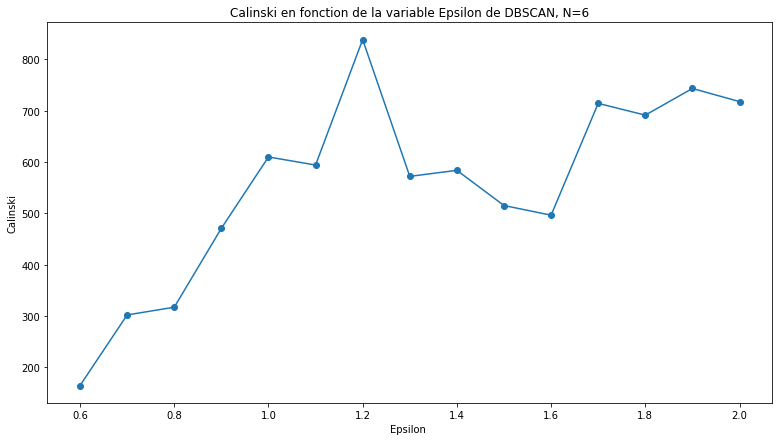

In [30]:
plt.figure(figsize=(13,7))

plt.title('Calinski en fonction de la variable Epsilon de DBSCAN, N=6')
plt.ylabel("Calinski")
plt.xlabel("Epsilon ")

#cluster.DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’,metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=1)

range_epsilon =[0.6, 0.7, 0.8, 0.9, 1.0, 
                1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0] 

calinski = []
for epsilon_val in range_epsilon:
    #epsilon_val = epsilon_val/10
    cls_dbscan= cluster.DBSCAN(eps=epsilon_val, 
                        min_samples=6, # le film d'entré + les 5 autres 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)

    cls_dbscan.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_dbscan.labels_)
    calinski.append(cali)

plt.plot(range_epsilon, calinski, marker='o')

In [31]:
test  =max(calinski)
test

838.5132530853474

<span style="color:#3366ff"> Calinski = 838 pour Epsilon =1.2    
<span style="color:#3366ff"> et Calinski = 750 pour Epsilon = 1.9.

<strong> eps de 0.6 a 6 / Min_sample à 15

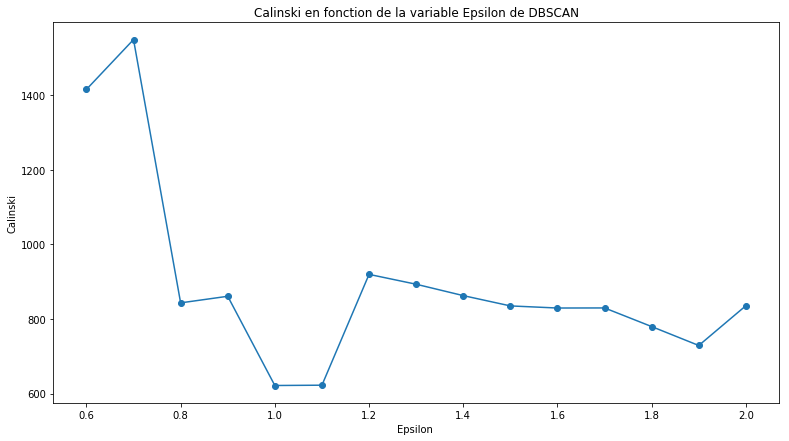

In [15]:
plt.figure(figsize=(13,7))

plt.title('Calinski en fonction de la variable Epsilon de DBSCAN')
plt.ylabel("Calinski")
plt.xlabel("Epsilon ")

#cluster.DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’,metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=1)

range_epsilon =[0.6, 0.7, 0.8, 0.9, 1.0, 
                1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0] 

calinski = []
for epsilon_val in range_epsilon:
    #epsilon_val = epsilon_val/10
    cls_dbscan= cluster.DBSCAN(eps=epsilon_val, 
                        min_samples=15, # le film d'entré + les 5 autres 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)

    cls_dbscan.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_dbscan.labels_)
    calinski.append(cali)

plt.plot(range_epsilon, calinski, marker='o')

In [16]:
calinski

[1415.8022755198733,
 1549.511689344549,
 843.2559311277649,
 860.9058273306465,
 621.5724303258735,
 622.4075892511042,
 919.6806352047048,
 893.2198482030009,
 862.704364018303,
 835.0805729332698,
 829.407300597154,
 829.628849836825,
 779.6440238482862,
 728.9201269281691,
 835.599609115771]

<span style="color:#3366ff"> Meilleur calinski 1549 pour eps= 0.7, N = 15,      
<span style="color:#3366ff"> puis ensuite eps = 1.2 (calinski = 919), N = 15       
<span style="color:#3366ff"> puis 860 pour epsilon = 0.9 , N = 15    

### Recherche du Nb de points par Cluster de DBSCAN: silhouette

<strong> eps = 0.7 / Nb point range = 6 -> 100

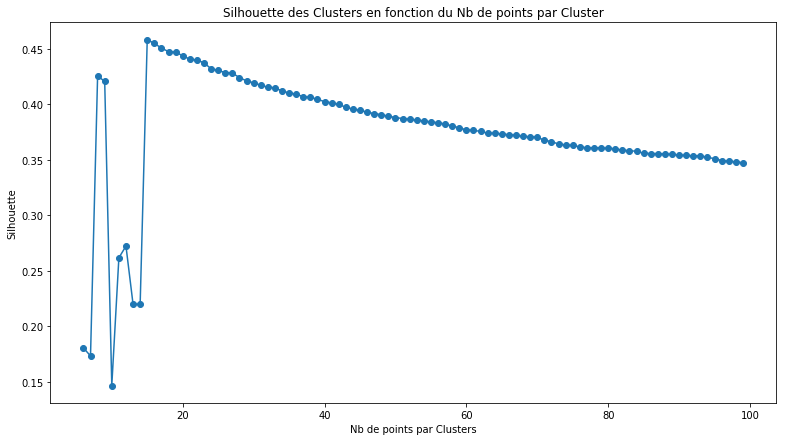

In [33]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction du Nb de points par Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de points par Clusters")

silhouettes = []
for min_samples_val in range(6,100):
    cls_dbscan= cluster.DBSCAN(eps=0.7, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_dbscan.labels_)
    silhouettes.append(silh)

plt.plot(range(6,100), silhouettes, marker='o')

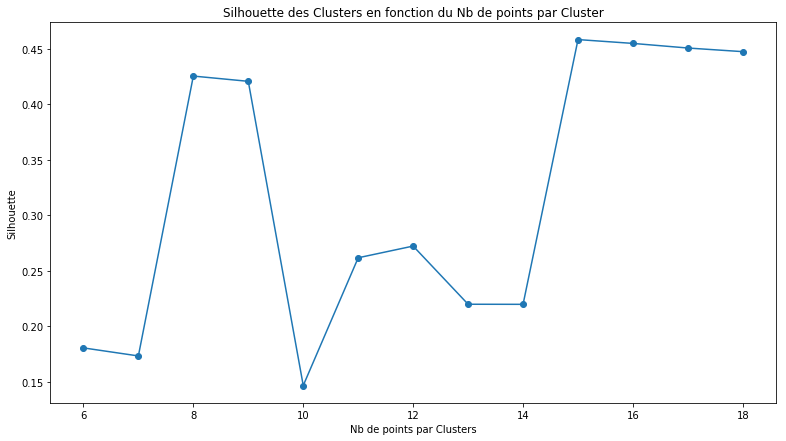

In [34]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction du Nb de points par Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de points par Clusters")

silhouettes = []
for min_samples_val in range(6,19):
    cls_dbscan= cluster.DBSCAN(eps=0.7, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_dbscan.labels_)
    silhouettes.append(silh)

plt.plot(range(6,19), silhouettes, marker='o')

<span style="color:#3366ff"> Silhouette = 0.45+ pour N=15, avec Eps=0.7.    
<span style="color:#3366ff"> Silhouette = 0.43 pour N=8, avec Eps = 0.7.

<strong> eps = 1.2 / Nb point range = 6 -> 100

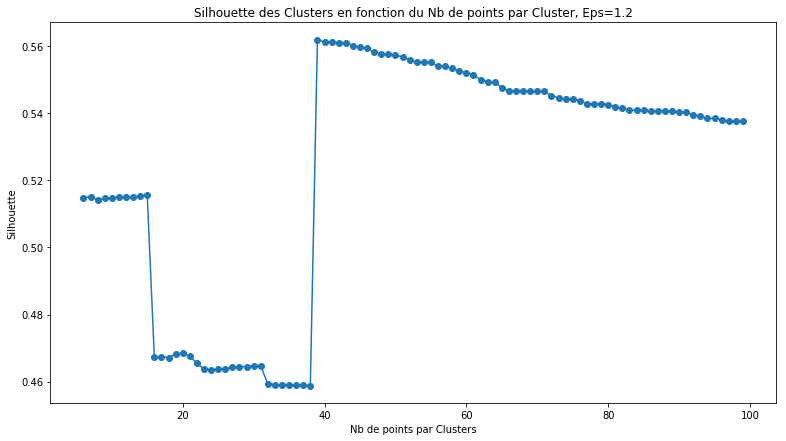

In [35]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction du Nb de points par Cluster, Eps=1.2')
plt.ylabel("Silhouette")
plt.xlabel("Nb de points par Clusters")

#cluster.DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’,metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=1)

silhouettes = []
for min_samples_val in range(6,100, 10):
    cls_dbscan= cluster.DBSCAN(eps=1.2, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_dbscan.labels_)
    silhouettes.append(silh)

plt.plot(range(6,100, 10), silhouettes, marker='o')

<strong> eps = 1.2 / Nb point range = 6 -> 40

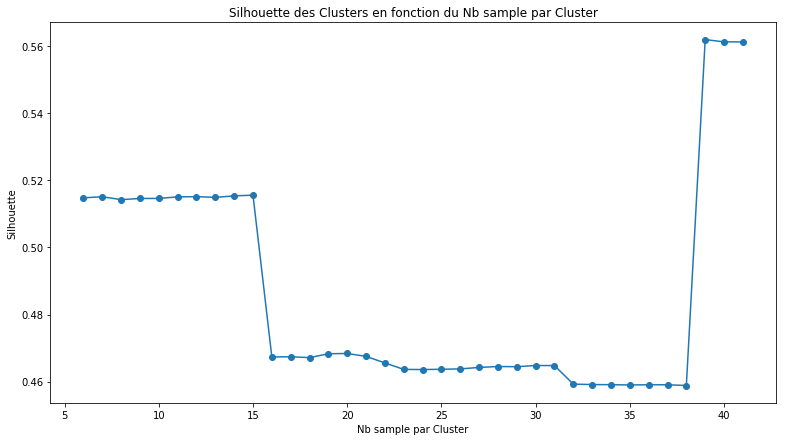

In [36]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction du Nb sample par Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb sample par Cluster")

silhouettes = []
for min_samples_val in range(6,42):
    cls_dbscan= cluster.DBSCAN(eps=1.2, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_dbscan.labels_)
    silhouettes.append(silh)

plt.plot(range(6,42), silhouettes, marker='o')

<span style="color:#3366ff"> Meilleures Silhouette pour N=39 pour Eps=1.2.

<strong> eps = 2 / Nb point range = 6 -> 100

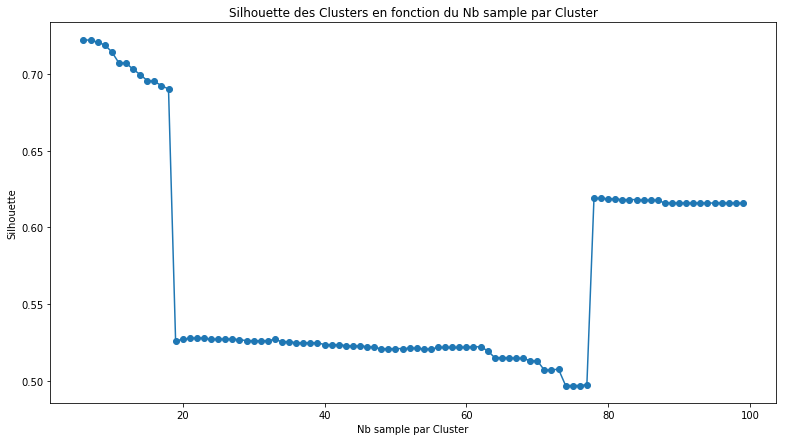

In [37]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction du Nb sample par Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb sample par Cluster")

silhouettes = []
for min_samples_val in range(6,100, 10):
    cls_dbscan= cluster.DBSCAN(eps=2, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_dbscan.labels_)
    silhouettes.append(silh)

plt.plot(range(6,100, 10), silhouettes, marker='o')

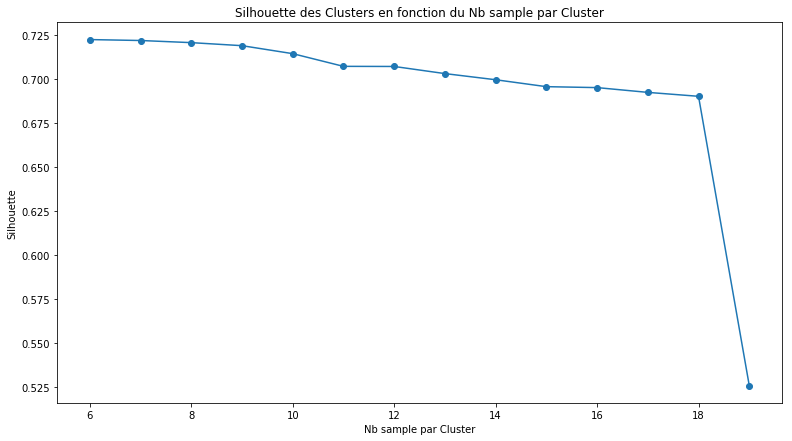

In [38]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction du Nb sample par Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb sample par Cluster")

silhouettes = []
for min_samples_val in range(6,20):
    cls_dbscan= cluster.DBSCAN(eps=2, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_dbscan.labels_)
    silhouettes.append(silh)

plt.plot(range(6,20), silhouettes, marker='o')

<span style="color:#3366ff"> Meilleures Silhouette = 0.72 pour N=6 pour Eps=2.

### Recherche du Nb sample par Cluster de DBSCAN: Calinski

<strong > eps = 0.7 / Nb point range = 6 -> 100

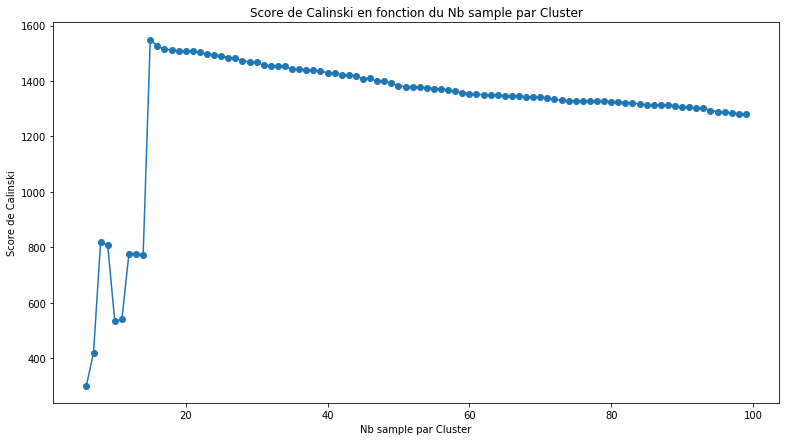

In [39]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb sample par Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb sample par Cluster")

calinski = []
for min_samples_val in range(6,100, 10):
    cls_dbscan= cluster.DBSCAN(eps=0.7, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_dbscan.labels_)
    calinski.append(cali)

plt.plot(range(6,100, 10), calinski, marker='o')

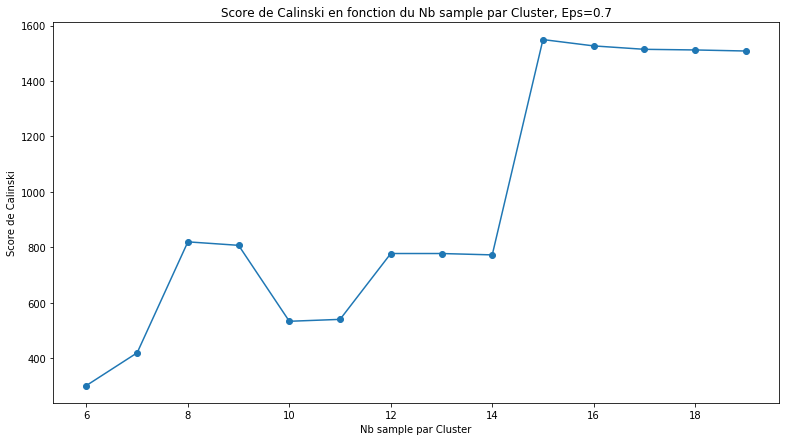

In [11]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb sample par Cluster, Eps=0.7')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb sample par Cluster")

calinski = []
for min_samples_val in range(6,20):
    cls_dbscan= cluster.DBSCAN(eps=0.7, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_dbscan.labels_)
    calinski.append(cali)

plt.plot(range(6,20), calinski, marker='o')

In [12]:
test = max(calinski)
test

1549.511689344549

<span style="color:#3366ff">  Cal = 1549 pour N = 15 avec Eps = 0.7

<strong > eps = 1.2 / Nb point range = 6 -> 100

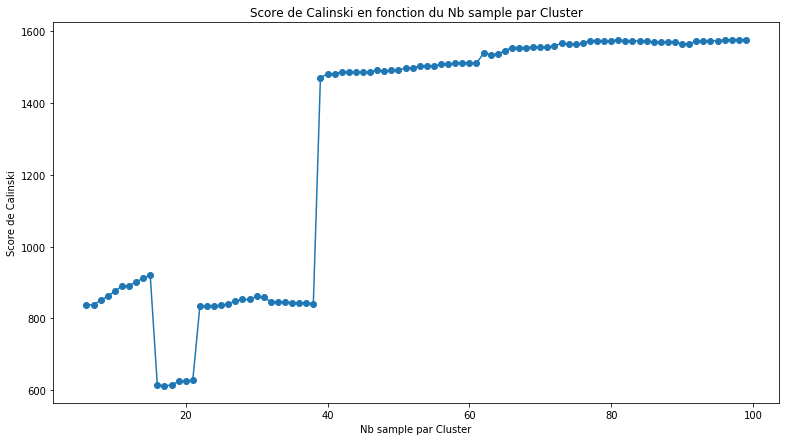

In [41]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb sample par Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb sample par Cluster")

calinski = []
for min_samples_val in range(6,100, 10):
    cls_dbscan= cluster.DBSCAN(eps=1.2, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_dbscan.labels_)
    calinski.append(cali)

plt.plot(range(6,100, 10), calinski, marker='o')

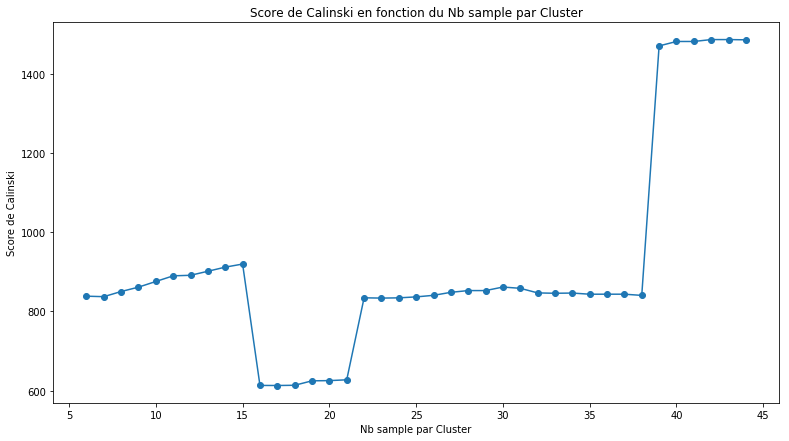

In [42]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb sample par Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb sample par Cluster")

calinski = []
for min_samples_val in range(6,45):
    cls_dbscan= cluster.DBSCAN(eps=1.2, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_dbscan.labels_)
    calinski.append(cali)

plt.plot(range(6,45), calinski, marker='o')

N=39

<strong >eps = 2 / Nb point range = 6 -> 100

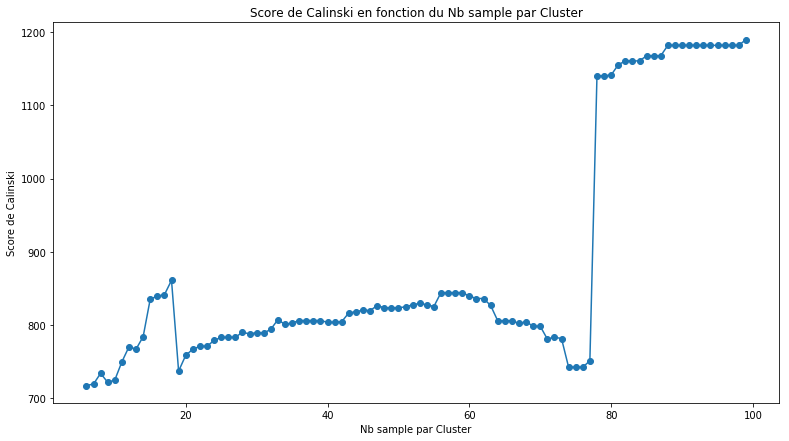

In [43]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb sample par Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb sample par Cluster")

calinski = []
for min_samples_val in range(6,100,10):
    cls_dbscan= cluster.DBSCAN(eps=2, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_dbscan.labels_)
    calinski.append(cali)

plt.plot(range(6,100, 10), calinski, marker='o')

<span style="color:#3366ff"> Calinski =# 1150 pour N=80 avec eps=2.

### Synthèse des hyperparamètres de DBSCAN

<strong> Quelques variables remarquables:

<span style="color:#3366ff"><table class="wikitable">
<tr>
<th>HyperParam</th>
<th>Valeurs Silhouette (S)</th>
<th>Valeurs Calinski (Cal)</th>
</tr>
<tr>
<td>Epsilon (E)</td>
<td>Avec N=6, S=0.7 pour E=2<br/>Avec N=15, S=0.7 pour E=2</td>
<td>Avec N=6, Cal= 800 pour E=1.2<br/>Avec N=15, Cal =1500 pour E=0.7</td>
</tr>
<tr>
<td>Nb Mini Point (N)</td>
<td>Avec E=0.7, S=0.43 pour N=8<br/>Avec E=2, S=0.7 pour N=18 </td>
<td>Avec E=0.7, Cal = 1600 pour N=15<br/> Avec E=2, Cal = 1150 pour N=80</td>
</tr>
<tr>
</table>

<span style="color:#3366ff"> Il n'est pas possible de déterminer clairement Epsilon ou le nombre minimum de points par Cluster.  
    
<span style="color:#3366ff"> Test avec:  
<span style="color:#3366ff"> - E=0.7 / N = 8;    
<span style="color:#3366ff"> - E=0.7 / N = 15;    
<span style="color:#3366ff"> - E=2 / N = 6;    
<span style="color:#3366ff"> - E=2 / N = 18.

### Affichage des Clusters de DBSCAN en 2 dimensions

Affichage de:
- E=0.7 / N = 8;    
- E=0.7 / N = 15;

Text(0.5,1,'DBSCAN en 2D avec eps = 0.7 & MiniP = 15')

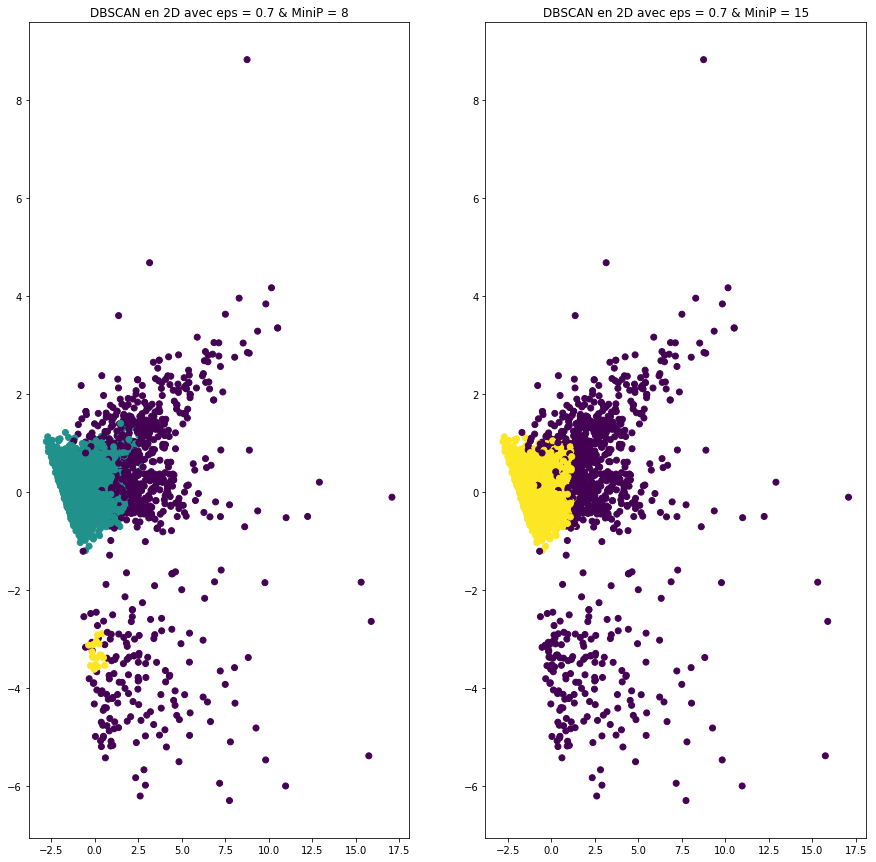

In [44]:
fig = plt.figure(figsize=(15,15))

cls_dbscan_7_8= cluster.DBSCAN(eps=0.7, 
                        min_samples=8, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
cls_dbscan_7_8.fit(data_films_prepro)
ax = fig.add_subplot(121)
ax.scatter(data_films_prepro_trans[:,0], 
           data_films_prepro_trans[:,1], 
           c=cls_dbscan_7_8.labels_)
ax.set_title("DBSCAN en 2D avec eps = 0.7 & MiniP = 8")

cls_dbscan_7_15= cluster.DBSCAN(eps=0.7, 
                        min_samples=15, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
cls_dbscan_7_15.fit(data_films_prepro)
ax = fig.add_subplot(122)
ax.scatter(data_films_prepro_trans[:,0], 
           data_films_prepro_trans[:,1], 
           c=cls_dbscan_7_15.labels_)
ax.set_title("DBSCAN en 2D avec eps = 0.7 & MiniP = 15")

Affichage de:
- E=2 / N = 6;
- E=2 / N = 18.

Text(0.5,1,'DBSCAN en 2D avec eps = 2 & MiniP = 18')

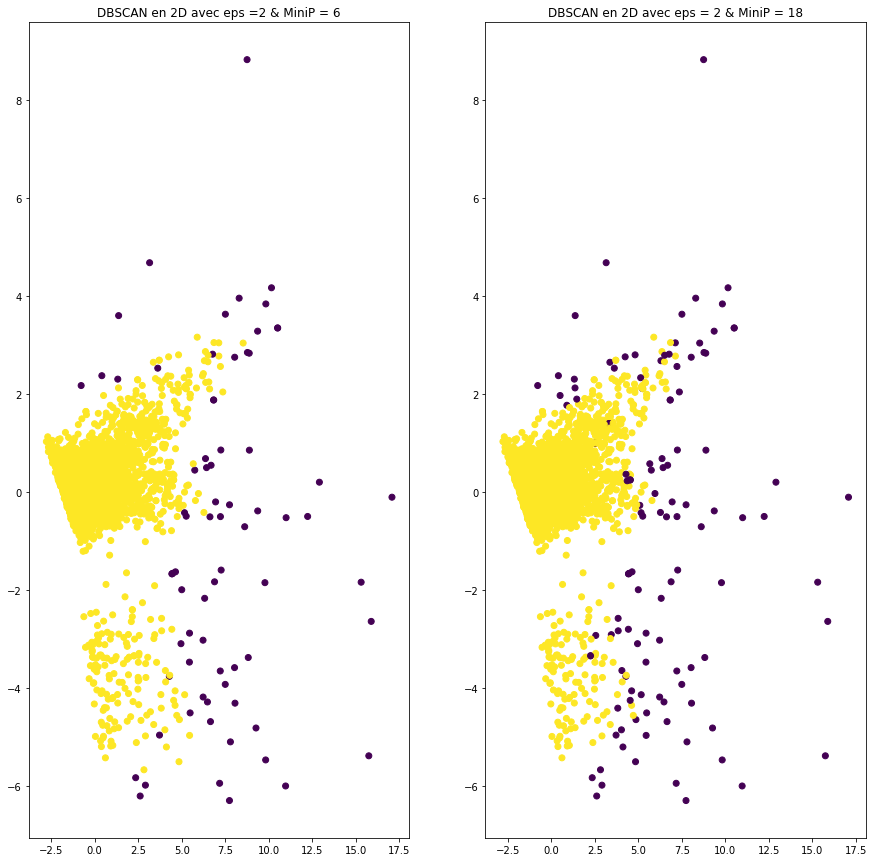

In [45]:
fig = plt.figure(figsize=(15,15))

cls_dbscan_2_6= cluster.DBSCAN(eps=2, 
                        min_samples=6, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
cls_dbscan_2_6.fit(data_films_prepro)
ax = fig.add_subplot(121)
ax.scatter(data_films_prepro_trans[:,0], 
           data_films_prepro_trans[:,1], 
           c=cls_dbscan_2_6.labels_)
ax.set_title("DBSCAN en 2D avec eps =2 & MiniP = 6")

cls_dbscan_2_18= cluster.DBSCAN(eps=2, 
                        min_samples=18, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
cls_dbscan_2_18.fit(data_films_prepro)
ax = fig.add_subplot(122)
ax.scatter(data_films_prepro_trans[:,0], 
           data_films_prepro_trans[:,1], 
           c=cls_dbscan_2_18.labels_)
ax.set_title("DBSCAN en 2D avec eps = 2 & MiniP = 18")

<span style="color:#3366ff"> Clustering pas très satisfaisant.

### Affichage des Clusters de DBSCAN en 3 dimensions

Affichage de:
- E=0.7 / N = 8;    
- E=0.7 / N = 15;

Text(0.5,0.92,'DBSCAN en 3D avec eps = 0.7 & MiniP = 15')

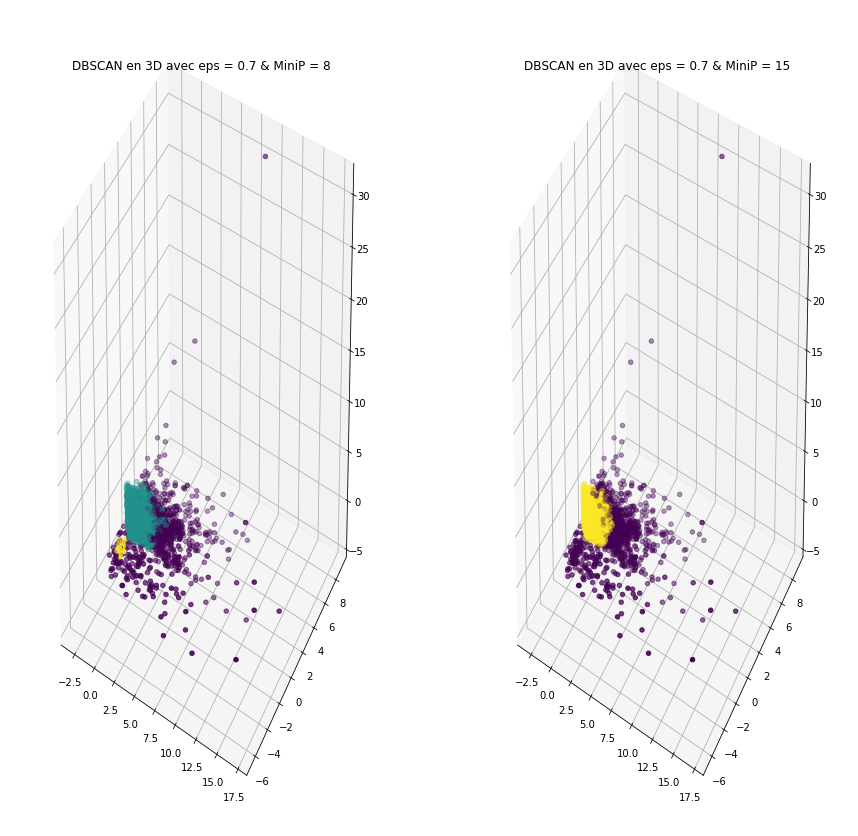

In [46]:
fig = plt.figure(figsize=(15,15))

#ax = fig.add_subplot(121,projection='3d')

cls_dbscan_7_8= cluster.DBSCAN(eps=0.7, 
                        min_samples=8, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
cls_dbscan_7_8.fit(data_films_prepro)
ax = fig.add_subplot(121,projection='3d')
ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2], 
           c=cls_dbscan_7_8.labels_)
ax.set_title("DBSCAN en 3D avec eps = 0.7 & MiniP = 8")


cls_dbscan_7_15= cluster.DBSCAN(eps=0.7, 
                        min_samples=15, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
cls_dbscan_7_15.fit(data_films_prepro)
ax = fig.add_subplot(122,projection='3d')
ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2], 
           c=cls_dbscan_7_15.labels_)
ax.set_title("DBSCAN en 3D avec eps = 0.7 & MiniP = 15")

Affichage de:
- E=2 / N = 6;
- E=2 / N = 18.

Text(0.5,0.92,'DBSCAN en 3D avec eps = 2 & MiniP = 18')

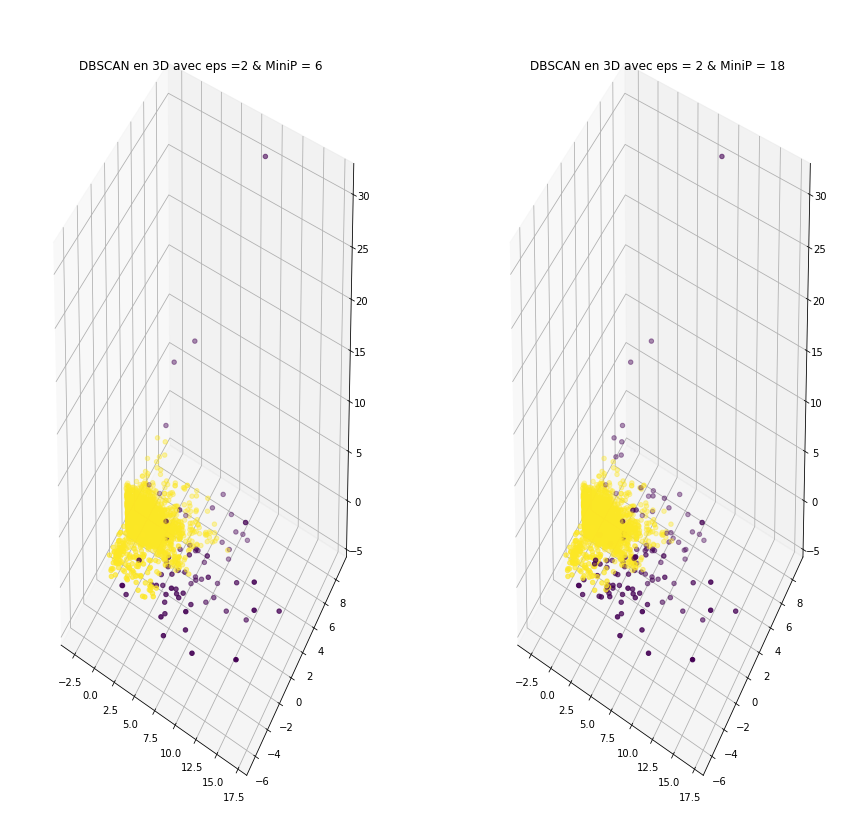

In [47]:
fig = plt.figure(figsize=(15,15))

cls_dbscan_2_6= cluster.DBSCAN(eps=2, 
                        min_samples=6, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
cls_dbscan_2_6.fit(data_films_prepro)
ax = fig.add_subplot(121,projection='3d')
ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2], 
           c=cls_dbscan_2_6.labels_)
ax.set_title("DBSCAN en 3D avec eps =2 & MiniP = 6")


cls_dbscan_2_18= cluster.DBSCAN(eps=2, 
                        min_samples=18, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
cls_dbscan_2_18.fit(data_films_prepro)
ax = fig.add_subplot(122,projection='3d')
ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2], 
           c=cls_dbscan_2_18.labels_)
ax.set_title("DBSCAN en 3D avec eps = 2 & MiniP = 18")

# Conslusion DBSCAN

<span style="color:#3366ff"> <strong > Conclusion: </strong > Le Clustering DBSCAN est fastidieux à mettre en place (douple hyperparamètres) et n'est pas satisfaisant.

# Identification de groupes de films par Clustering Hierarchique

<span style="color:#3366ff"> <strong> --> Le Clustering Hierarchique a un hyperparamètre: le Nb de Cluster

### CAH Recherche du Nb de Clusters: silhouette

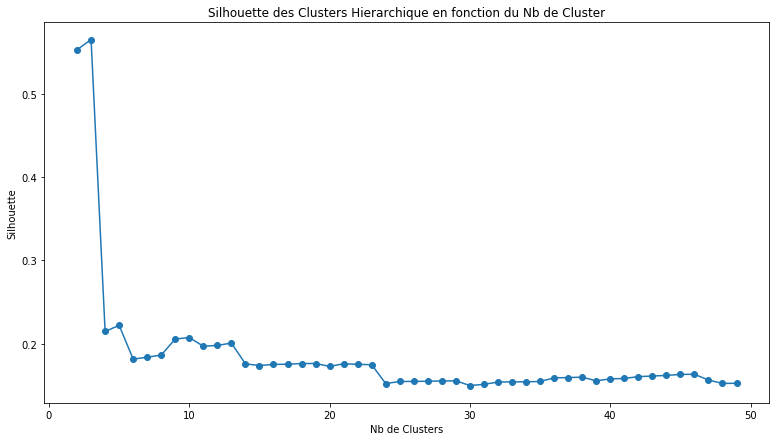

In [48]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters Hierarchique en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")


silhouettes = []
for num_cluster in range(2,40):
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )
    cls_cah.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_cah.labels_)
    silhouettes.append(silh)

plt.plot(range(2,40), silhouettes, marker='o')

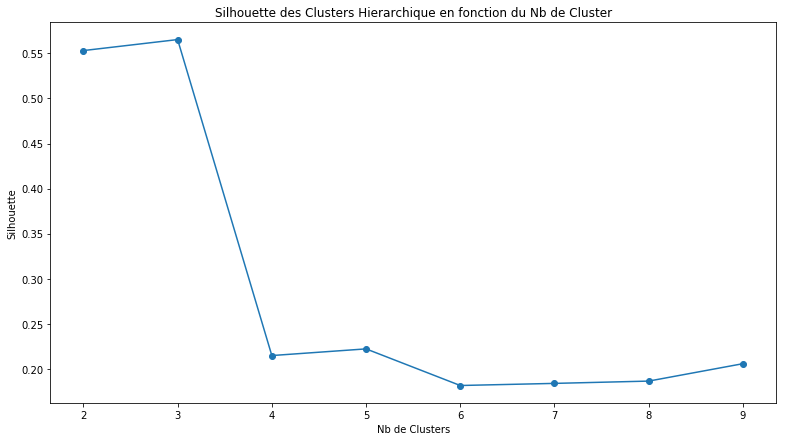

In [49]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters Hierarchique en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")


silhouettes = []
for num_cluster in range(2,10):
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )
    cls_cah.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_cah.labels_)
    silhouettes.append(silh)

plt.plot(range(2,10), silhouettes, marker='o')

<span style="color:#3366ff"> Meilleur Coef de Silhouette pour 2 et 3 clusters.

### CAH Recherche du Nb de Clusters: Calinski

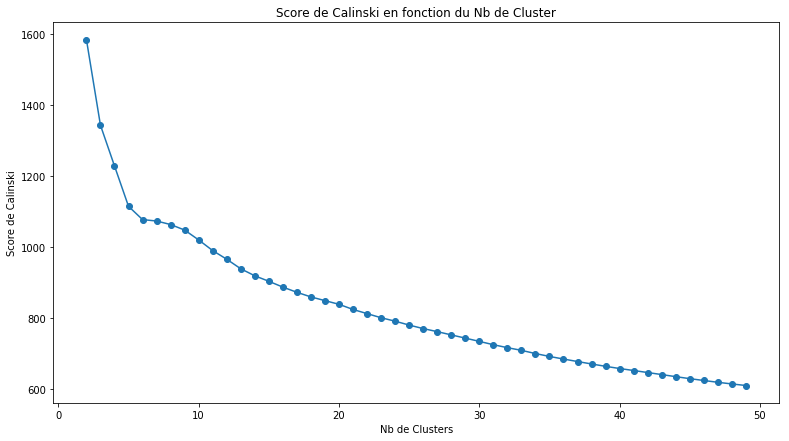

In [50]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")


calinski = []
for num_cluster in range(2,40):
    #epsilon_val = epsilon_val/10
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward') 

    cls_cah.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_cah.labels_)
    calinski.append(cali)

plt.plot(range(2,40), calinski, marker='o')

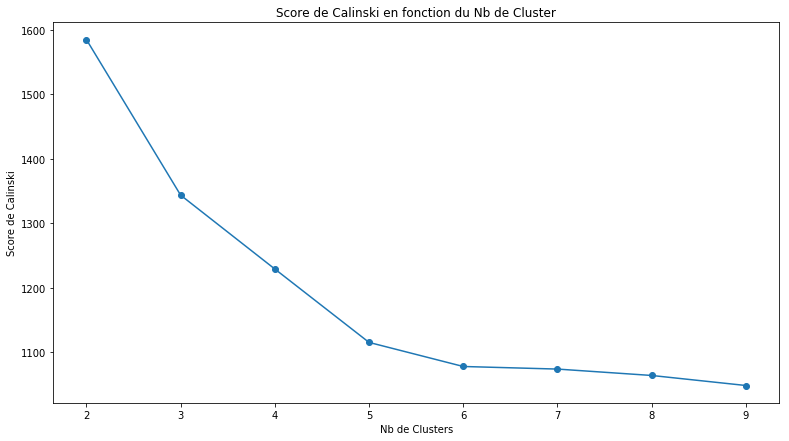

In [8]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")


calinski = []
for num_cluster in range(2,10):
    #epsilon_val = epsilon_val/10
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward') 

    cls_cah.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_cah.labels_)
    calinski.append(cali)

plt.plot(range(2,10), calinski, marker='o')

In [9]:
test  =max(calinski)
test

1584.642768307585

In [10]:
calinski

[1584.642768307585,
 1343.55886873557,
 1229.0748982115117,
 1115.3354194383974,
 1078.0186324126216,
 1074.0145189716286,
 1064.1038534622057,
 1048.5520309795238]

<span style="color:#3366ff"> Meilleur Calinski pour 2 (cal = 1584), 3 (Cal = 1343) ou 4 Clusters (Cal = 1229).

### Affichage des Clustering Hierarchique en 2 dimensions

Text(0.5,1,'Clustering Hierarchique de 4 groupes en 2D')

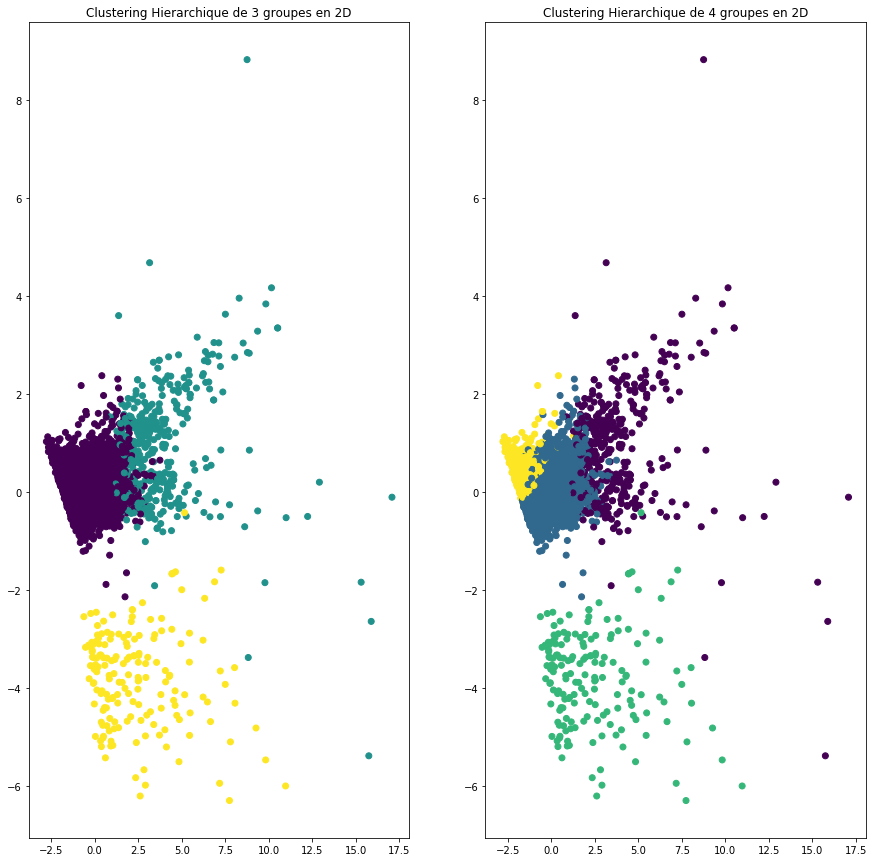

In [52]:
fig = plt.figure(figsize=(15,15))


cls_cah_3 = cluster.AgglomerativeClustering(n_clusters=3, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward') 
cls_cah_3.fit(data_films_prepro)
ax = fig.add_subplot(121)
ax.scatter(data_films_prepro_trans[:,0], 
           data_films_prepro_trans[:,1], 
           c=cls_cah_3.labels_)
ax.set_title("Clustering Hierarchique de 3 groupes en 2D")


cls_cah_4 = cluster.AgglomerativeClustering(n_clusters=4, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward') 
cls_cah_4.fit(data_films_prepro)
ax = fig.add_subplot(122)
ax.scatter(data_films_prepro_trans[:,0], 
           data_films_prepro_trans[:,1], 
           c=cls_cah_4.labels_)
ax.set_title("Clustering Hierarchique de 4 groupes en 2D")

<span style="color:#3366ff"> Clustering satisfaisant.

### Affichage des Clustering Hierarchique en 3 dimensions

Text(0.5,0.92,'Clustering Hierarchique de 4 groupes en 3D')

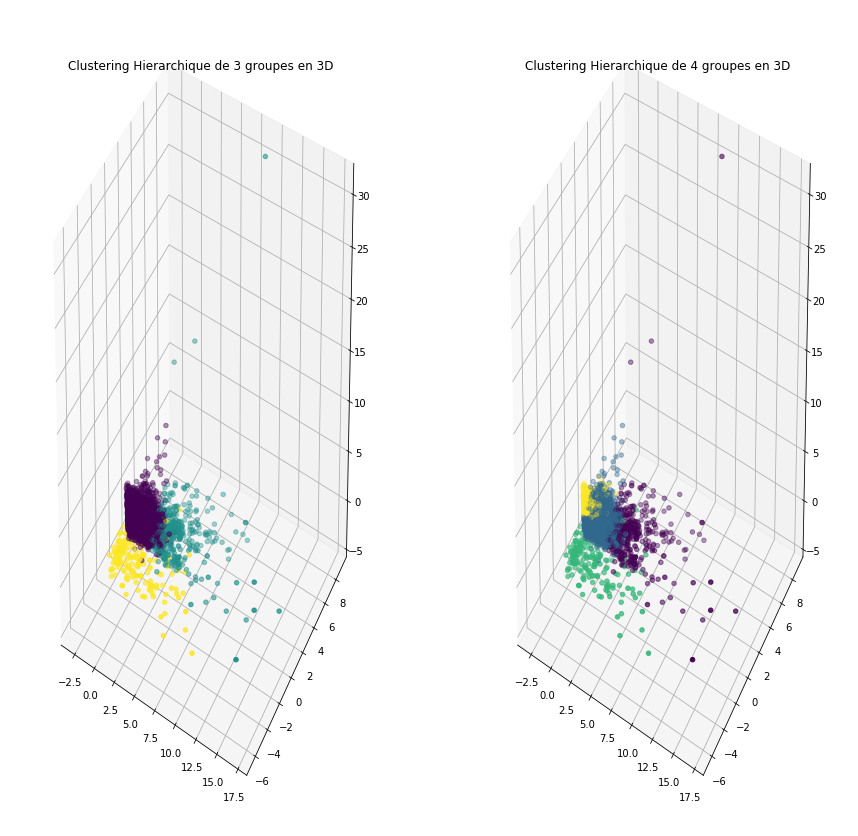

In [53]:
fig = plt.figure(figsize=(15,15))


cls_cah_3 = cluster.AgglomerativeClustering(n_clusters=3, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward') 
cls_cah_3.fit(data_films_prepro)
ax = fig.add_subplot(121,projection='3d')
ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2],
           c=cls_cah_3.labels_)
ax.set_title("Clustering Hierarchique de 3 groupes en 3D")


cls_cah_4 = cluster.AgglomerativeClustering(n_clusters=4, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward') 
cls_cah_4.fit(data_films_prepro)
ax = fig.add_subplot(122,projection='3d')
ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2],
           c=cls_cah_4.labels_)
ax.set_title("Clustering Hierarchique de 4 groupes en 3D")

# Conslusion CAH

<span style="color:#3366ff"> <strong> Le Clustering CAH est satisfaisant.

# Conclusion des divers méthodes de Clustering Variables Numériques

<span style="color:#3366ff"> A) K-MEANS possible en 2 groupes (Cal = 1805),3 (Cal = 1390) ou 8 (Cal = 1200) ;    
<span style="color:#3366ff"> B) DBSCAN : Cal = 1549 avec N = 15 et Eps = 0.7;    
<span style="color:#3366ff"> C) CAH: clustering possible en 3 groupes (Cal = 1385).    
    
<span style="color:#3366ff"> Pour les variables Numériques , le modèle avec le meilleur Calinski est le DBSCAN (N=15 & Eps=0.7).

# Synthèse globale Clustering : Variable Num, Alphanum et Mix Alpha Num  

<span style="color:#3366ff">  <strong> Le Clustering qui a la meilleure Silhouettte et le meilleure Calinski est le CAH avec N = 50 sur un mix de paramèters numériques et alphanumériques.

# CONCLUSION

<span style="color:#3366ff"> Ce moteur, bien qu’imparfait, permet de proposer des films aux 1ers utilisateurs du site.

<span style="color:#3366ff"> Pour cela il utilise les variables suivants de la base de donnée IMDb:    
<span style="color:#3366ff"> - director_facebook_likes,    
<span style="color:#3366ff">- cast_total_facebook_likes,    
<span style="color:#3366ff"> - num_critic_for_reviews,    
<span style="color:#3366ff"> - num_voted_users,    
<span style="color:#3366ff"> - num_user_for_reviews,    
<span style="color:#3366ff"> - imdb_score,    
<span style="color:#3366ff"> - movie_facebook_likes
<span style="color:#3366ff"> - Les 23 « genres » déconcaténés,
<span style="color:#3366ff"> - Les 15 « content_rating » déconcaténés.

<span style="color:#3366ff"> <strong> Inconvénient de ce moteur: </strong>      
<span style="color:#3366ff">     - système basé sur un "petit" clustering     
<span style="color:#3366ff">     - les films les plus vieux sont moins populaires sur facebook -> biais     